In [4]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.6 MB/s eta 0:00:00


In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [6]:
bsl=ctrl.Antecedent(np.arange(60,220.1,0.1),'bsl')
bmi=ctrl.Antecedent(np.arange(16,32.6,0.1),'bmi')
fu=ctrl.Antecedent(np.arange(1,15.1,0.1),'fu')
fl=ctrl.Antecedent(np.arange(0,100.1,0.1),'fl')

risk=ctrl.Consequent(np.arange(0,100.1,0.1),'risk')

In [7]:
bsl['low']=fuzz.gaussmf(bsl.universe,80,10)
bsl['normal']=fuzz.gaussmf(bsl.universe,100,25)
bsl['high']=fuzz.gaussmf(bsl.universe,160,12)
bsl['very high']=fuzz.gaussmf(bsl.universe,220,15)

In [8]:
bmi['low']=fuzz.gaussmf(bmi.universe,16,2)
bmi['normal']=fuzz.gaussmf(bmi.universe,22,4)
bmi['high']=fuzz.gaussmf(bmi.universe,27,3)
bmi['very high']=fuzz.gaussmf(bmi.universe,32.6,2.5)

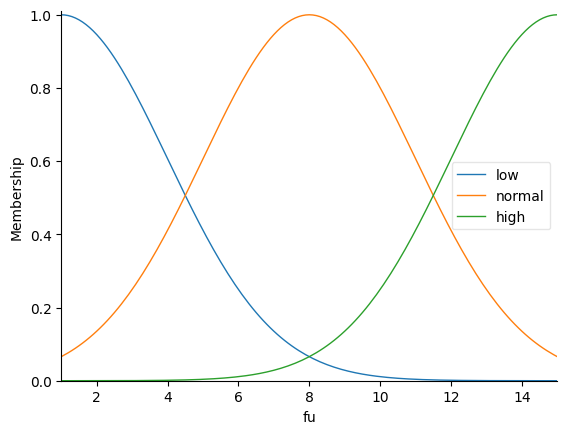

In [9]:
fu['low']=fuzz.gaussmf(fu.universe,1,3)
fu['normal']=fuzz.gaussmf(fu.universe,8,3)
fu['high']=fuzz.gaussmf(fu.universe,15,3)
fu.view()

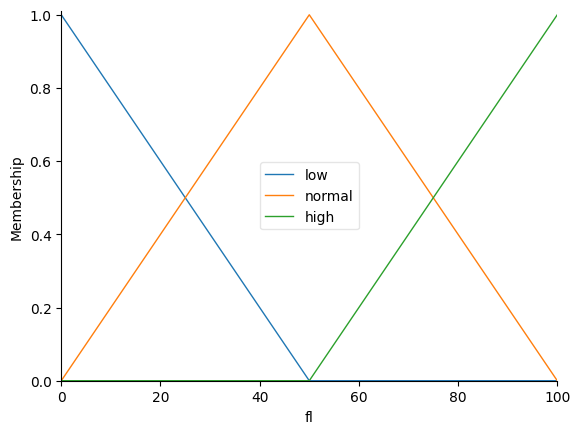

In [10]:
fl['low']=fuzz.trimf(fl.universe,[0,0,50])
fl['normal']=fuzz.trimf(fl.universe,[0,50,100])
fl['high']=fuzz.trimf(fl.universe,[50,100,100])
fl.view()

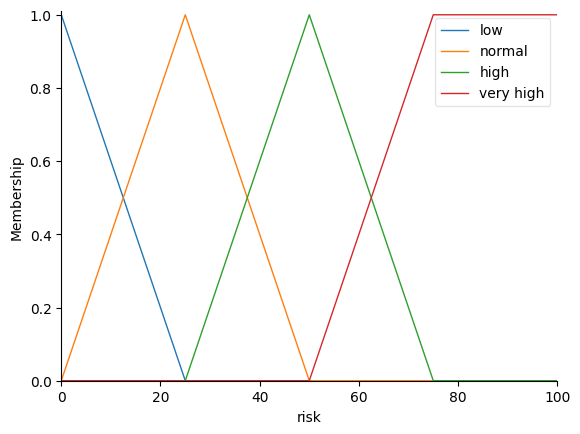

In [11]:
risk['low']=fuzz.trimf(risk.universe,[0,0,25])
risk['normal']=fuzz.trimf(risk.universe,[0,25,50])
risk['high']=fuzz.trimf(risk.universe,[25,50,75])
risk['very high']=fuzz.trapmf(risk.universe,[50,75,100,100])
risk.view()

In [12]:
rule1=ctrl.Rule(bsl['very high']&fu['high'],risk['very high'])
rule2=ctrl.Rule(bsl['very high']&fu['normal'],risk['high'])
rule3=ctrl.Rule(bsl['high']&fu['normal'],risk['high'])
rule4=ctrl.Rule(bsl['normal']&fu['low'],risk['low'])

In [13]:
rule5=ctrl.Rule(bsl['very high']&bmi['very high'],risk['very high'])
rule6=ctrl.Rule(bsl['very high']&bmi['high'],risk['high'])
rule7=ctrl.Rule(bsl['high']&bmi['normal'],risk['normal'])
rule8=ctrl.Rule(bsl['high']&bmi['high'],risk['high'])
rule9=ctrl.Rule(bsl['normal']&bmi['normal'],risk['low'])

In [14]:
rule10=ctrl.Rule(bsl['very high']&fl['high'],risk['very high'])
rule11=ctrl.Rule(bsl['high']&fl['high'],risk['high'])
rule12=ctrl.Rule(bsl['high']&fl['normal'],risk['normal'])
rule13=ctrl.Rule(bsl['normal']&fl['low'],risk['low'])

10.209260464939227


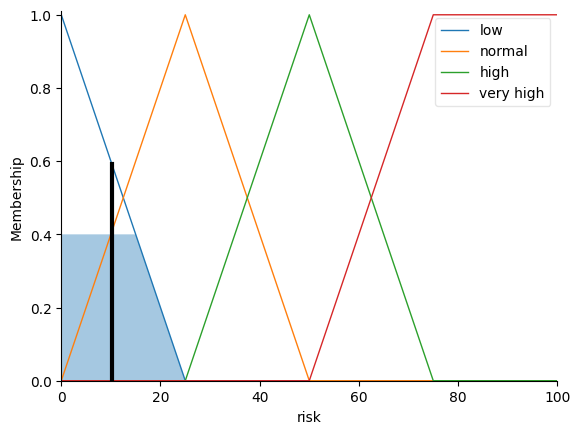

In [15]:
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['bsl']=100
tipping.input['bmi']=16
tipping.input['fu']=40
tipping.input['fl']=30
tipping.compute()
print(tipping.output['risk'])
risk.view(sim=tipping)